### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("melb_data.csv")

In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### Initial Data Exploration

In [5]:
df.shape

(13580, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [7]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [8]:
df.isnull().mean() * 100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2          0.000000
Bathroom          0.000000
Car               0.456554
Landsize          0.000000
BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.000000
Propertycount     0.000000
dtype: float64

- **The missing data is not more than 70% in any of the columns so column-wise deletion is not good**
- **Since only 4 variables has missing values row-wise deletion is also not good**
# **Imputation**
- **Mean for Numerical variable -- if no Outliers**
- **Median for Numerical Variable -- if Outliers**
- **Mode for Categorical Variable**
- **There is no missing values variable which is timeseries so not an option for forward/backward fill**

In [9]:
df['Car'].value_counts()  ##--> mode

Car
2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: count, dtype: int64

In [10]:
df['BuildingArea'].value_counts()  ##--> Mean or Median

BuildingArea
120.00    114
110.00     89
100.00     88
130.00     84
115.00     77
         ... 
255.79      1
424.00      1
186.36      1
147.20      1
368.00      1
Name: count, Length: 602, dtype: int64

In [12]:

df['YearBuilt'].value_counts()  ##--> Mean or Median


YearBuilt
1970.0    866
1960.0    725
1950.0    580
1900.0    341
1980.0    338
         ... 
1897.0      1
1933.0      1
1830.0      1
1901.0      1
1857.0      1
Name: count, Length: 144, dtype: int64

In [13]:
df['CouncilArea'].value_counts() ##--> Mode

CouncilArea
Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: count, dtype: int64

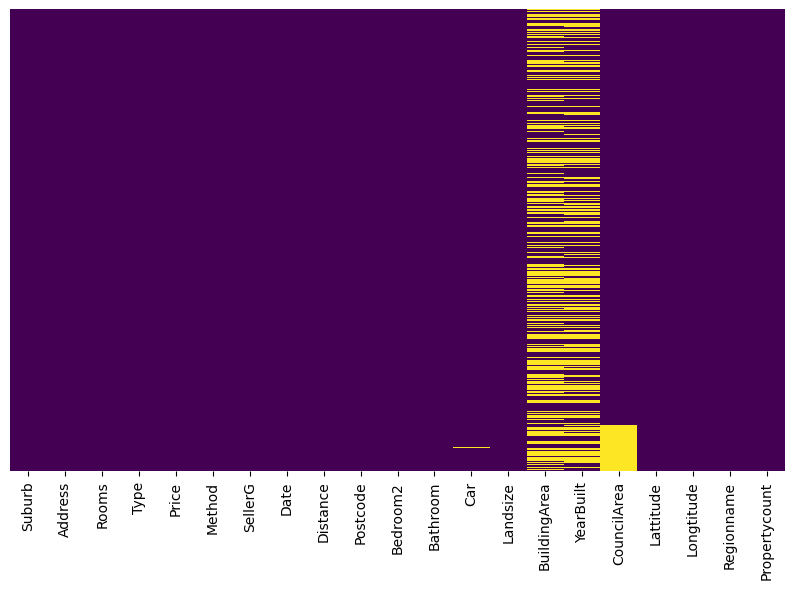

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False,  cmap='viridis', yticklabels=False)
plt.show()

In [15]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.00,13580.00,13580.00,13580.00,13580.00,13580.00,13518.00,13580.00,7130.00,8205.00,13580.00,13580.00,13580.00
mean,2.94,1075684.08,10.14,3105.30,2.91,1.53,1.61,558.42,151.97,1964.68,-37.81,145.00,7454.42
std,0.96,639310.72,5.87,90.68,0.97,0.69,0.96,3990.67,541.01,37.27,0.08,0.10,4378.58
min,1.00,85000.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.18,144.43,249.00
25%,2.00,650000.00,6.10,3044.00,2.00,1.00,1.00,177.00,93.00,1940.00,-37.86,144.93,4380.00
50%,3.00,903000.00,9.20,3084.00,3.00,1.00,2.00,440.00,126.00,1970.00,-37.80,145.00,6555.00
75%,3.00,1330000.00,13.00,3148.00,3.00,2.00,2.00,651.00,174.00,1999.00,-37.76,145.06,10331.00
max,10.00,9000000.00,48.10,3977.00,20.00,8.00,10.00,433014.00,44515.00,2018.00,-37.41,145.53,21650.00


### Checking Outliers to Handle Missing Values

# **Numerical Data**

# **1. Statistical Methods**

# **a. Z-score**

In [16]:
from scipy import stats
z_scores = stats.zscore(df['BuildingArea'])
outliers=df[abs(z_scores) > 3]
print(outliers)

Empty DataFrame
Columns: [Suburb, Address, Rooms, Type, Price, Method, SellerG, Date, Distance, Postcode, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude, Longtitude, Regionname, Propertycount]
Index: []

[0 rows x 21 columns]


In [17]:
z_scores_1 = stats.zscore(df['YearBuilt'])
outliers_1=df[abs(z_scores_1) > 1]
print(outliers)

Empty DataFrame
Columns: [Suburb, Address, Rooms, Type, Price, Method, SellerG, Date, Distance, Postcode, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude, Longtitude, Regionname, Propertycount]
Index: []

[0 rows x 21 columns]


- **Z-score method works well for normally distributed data and detects values thar are far from the mean**
- **Z-score method didn't show any outliers in both BuildingArea and YearBuilt column is because the values are close to mean and within a standard deviation of 3**.

**b. IQR (Interquartile Range)**

In [18]:
Q1 = df['BuildingArea'].quantile(0.25)
Q3 = df['BuildingArea'].quantile(0.75)
IQR = Q3 - Q1

# Define Outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Get entire row of the outlier values from the BuildingArea Column
outliers_IQR = df[(df['BuildingArea'] < lower_bound) | (df['BuildingArea'] > upper_bound)]
print(outliers_IQR)

                  Suburb             Address  Rooms Type      Price Method  \
63          Airport West      6 Kittyhawk St      4    h  773000.00      S   
204         Altona North          21 Neal Ct      3    h  770000.00     SP   
251             Armadale    367 Dandenong Rd      6    h 5525000.00      S   
273             Armadale       44 Hampden Rd      4    h 4200000.00     VB   
292           Ascot Vale   75 Maribyrnong Rd      6    h 2425000.00     PI   
...                  ...                 ...    ...  ...        ...    ...   
13365         Briar Hill      77 Karingal Dr      4    h 1030000.00      S   
13474            Kooyong       707 Toorak Rd      4    h 3080000.00     SP   
13503     Mount Waverley  17 Huntingtower Cr      6    h 1840000.00      S   
13518           Parkdale        63 The Corso      4    h 2475000.00     PI   
13560  Templestowe Lower      50 Caroline Dr      5    h 1400000.00      S   

             SellerG        Date  Distance  Postcode  ...  Bath

In [19]:
Q1 = df['YearBuilt'].quantile(0.25)
Q3 = df['YearBuilt'].quantile(0.75)
IQR = Q3 - Q1

# Define Outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Get only the outlier values from the YearBuilt Column
outliers_IQR = df[(df['YearBuilt'] < lower_bound) | (df['YearBuilt'] > upper_bound)]['YearBuilt']

print(outliers_IQR)

2079   1830.00
2554   1850.00
4843   1850.00
5405   1850.00
5860   1850.00
9968   1196.00
Name: YearBuilt, dtype: float64


- **IQR is more robust to skewed or non-normal data distributions and detect outliers that are distant from the middle 50% of the data (based on quartiles)**

# **If data is skewed IQR detect outliers where Z-scores do not**

# **Visual Methods**

# **a. Box Plot**

<Axes: xlabel='BuildingArea'>

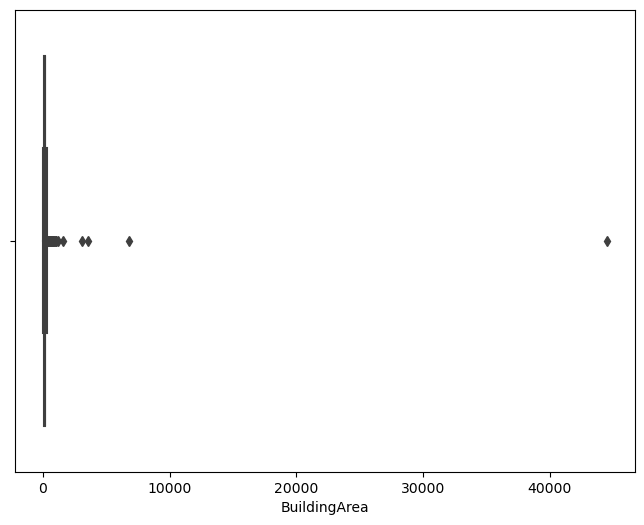

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['BuildingArea'])

<Axes: >

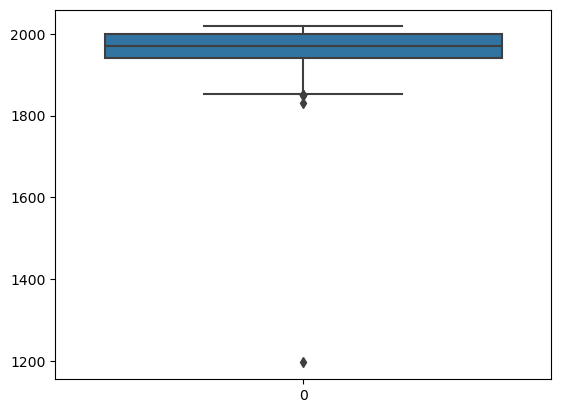

In [21]:
sns.boxplot(df['YearBuilt'])

# **b.Scatter Plot**

plt.scatter(df['BuildingArea'], df['Price'])

# **3. Using Machine Learning (For Complex Outliers)**
- **a. Isolation Forest**
- **b.One-Class SVM**

### Categorical Data

# **Frequency-based Approach**
- **Categories that occur less than a certain threshold are considered outliers**

In [22]:
threshold = 5
value_counts = df['Car'].value_counts()
rare_categories = value_counts[value_counts < threshold]
outliers = df[df['Car'].isin(rare_categories.index)]['Car']
print(outliers)

8963     9.00
9423    10.00
11642   10.00
13527   10.00
Name: Car, dtype: float64


### Handling Missing Values - Imputation

**Numerical Variables**

# **Mean**

In [23]:
df['BuildingArea_mean'] = df['BuildingArea'].fillna(df['BuildingArea'].mean(), inplace=False)
imputed_rows = df[df['BuildingArea'].isna()]
imputed_rows[['BuildingArea', 'BuildingArea_mean']]

,BuildingArea,BuildingArea_mean
0,NaN,151.97
3,NaN,151.97
5,NaN,151.97
8,NaN,151.97
10,NaN,151.97
...,...,...
13569,NaN,151.97
13570,NaN,151.97
13574,NaN,151.97
13575,NaN,151.97


In [24]:
df['YearBuilt_mean'] = df['YearBuilt'].fillna(df['YearBuilt'].mean(), inplace=False)
imputed_rows = df[df['YearBuilt'].isna()]
imputed_rows[['YearBuilt', 'YearBuilt_mean']]

,YearBuilt,YearBuilt_mean
0,NaN,1964.68
3,NaN,1964.68
5,NaN,1964.68
8,NaN,1964.68
10,NaN,1964.68
...,...,...
13566,NaN,1964.68
13567,NaN,1964.68
13569,NaN,1964.68
13570,NaN,1964.68


# **Median**

In [25]:
df['BuildingArea_Median'] = df['BuildingArea'].fillna(df['BuildingArea'].median(), inplace=False)
imputed_rows = df[df['BuildingArea'].isna()]
imputed_rows[['BuildingArea', 'BuildingArea_Median']]

,BuildingArea,BuildingArea_Median
0,NaN,126.00
3,NaN,126.00
5,NaN,126.00
8,NaN,126.00
10,NaN,126.00
...,...,...
13569,NaN,126.00
13570,NaN,126.00
13574,NaN,126.00
13575,NaN,126.00


In [26]:
df['YearBuilt_Median'] = df['YearBuilt'].fillna(df['YearBuilt'].median(), inplace=False)
imputed_rows = df[df['YearBuilt'].isna()]
imputed_rows[['YearBuilt', 'YearBuilt_Median']]

,YearBuilt,YearBuilt_Median
0,NaN,1970.00
3,NaN,1970.00
5,NaN,1970.00
8,NaN,1970.00
10,NaN,1970.00
...,...,...
13566,NaN,1970.00
13567,NaN,1970.00
13569,NaN,1970.00
13570,NaN,1970.00


In [27]:
df[['YearBuilt', 'YearBuilt_mean', 'YearBuilt_Median', 'BuildingArea', 'BuildingArea_mean', 'BuildingArea_Median']].describe()

,YearBuilt,YearBuilt_mean,YearBuilt_Median,BuildingArea,BuildingArea_mean,BuildingArea_Median
count,8205.00,13580.00,13580.00,7130.00,13580.00,13580.00
mean,1964.68,1964.68,1966.79,151.97,151.97,139.63
std,37.27,28.97,29.09,541.01,392.00,392.22
min,1196.00,1196.00,1196.00,0.00,0.00,0.00
25%,1940.00,1960.00,1960.00,93.00,122.00,122.00
50%,1970.00,1964.68,1970.00,126.00,151.97,126.00
75%,1999.00,1975.00,1975.00,174.00,151.97,129.94
max,2018.00,2018.00,2018.00,44515.00,44515.00,44515.00


- **For "YearBuilt" mean and median values are close. Distribution is summetrical and doesn't have extreme outliers. Both imputations are good but mean would be better as it can retain some continuity with the original values**
- **For "BuildingArea" the difference between mean and median is much more significant. This suggests the feature has a skewed distribution with some higher values(outliers) pulling the mean up. So median would be better**

### KNN Imputation

- **1. Select a row with a missing value.**
- **2. Find its k nearest neighbors using the non-missing feature values.**
- **3. Impute the missing feature of the row using the corresponding non-missing values of k nearest neighbor rows.**
- **4. Repeat for all rows with missing values.**

# Drawbacks
- **Does not support categorical features.**
- **High run-time for imputation especially for high-dimensional datasets.**